original boxplots


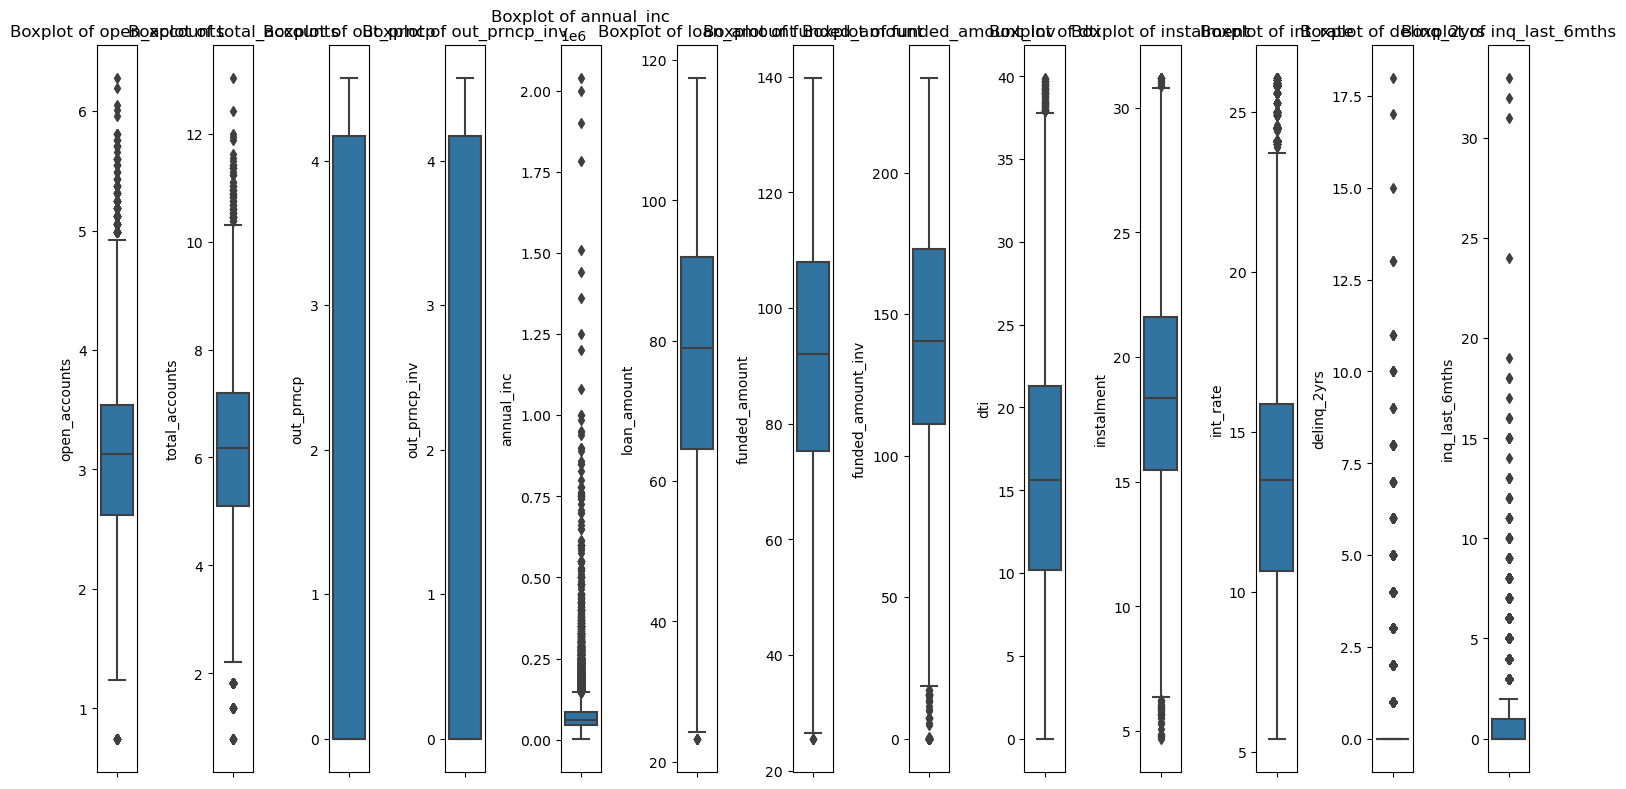

In [1]:
import pandas as pd
from db_utils import Plotter, DataTransform
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('data2.csv')
'''get back to these
#PL = Plotter()
#DT = DataTransform()
#columns = ['open_accounts','total_accounts','out_prncp','out_prncp_inv','annual_inc','loan_amount','funded_amount','funded_amount_inv','dti','instalment','int_rate','delinq_2yrs','inq_last_6mths']
'''
'''useless
#df = PL.generate_a_plot_for_nulls(df)

#df = PL.generate_a_plot_for_nulls(df)
#print(df.nunique())

#make a scatter plot
#print(df.describe())

#for i in df:
#    print(df.describe()[[i]])

#plt.scatter(df.index, df['funded_amount'])
#plt.scatter(df.index, df['funded_amount'])
#plt.scatter(df.index, df['funded_amount'])
#plt.scatter(df.index, df['funded_amount'])
#plt.scatter(df.index, df['funded_amount'])
'''
'''describe
print(df.describe()[['loan_amount']])
print(df.describe()[['funded_amount']])
print(df.describe()[['funded_amount_inv']])
print(df.describe()[['int_rate']])
print(df.describe()[['instalment']])
#print(df.describe()[['grade']])
#print(df.describe()[['sub_grade']])
#print(df.describe()[['employment_length']])
#print(df.describe()[['home_ownership']])
print(df.describe()[['annual_inc']])
#print(df.describe()[['verification_status']])
#print(df.describe()[['issue_date']])
#print(df.describe()[['loan_status']])
#print(df.describe()[['payment_plan']])
#print(df.describe()[['purpose']])
print(df.describe()[['dti']])
print(df.describe()[['delinq_2yrs']])
#print(df.describe()[['earliest_credit_line']])
print(df.describe()[['inq_last_6mths']])
print(df.describe()[['open_accounts']])
print(df.describe()[['total_accounts']])
print(df.describe()[['out_prncp']])
print(df.describe()[['out_prncp_inv']])['loan_amount']
'''
columns = ['open_accounts','total_accounts','out_prncp','out_prncp_inv', 'annual_inc', 'loan_amount', 'funded_amount', 'funded_amount_inv', 'dti', 'instalment', 'int_rate','delinq_2yrs', 'inq_last_6mths']

def plot_boxplots(df, columns):
    plt.figure(figsize=(15, 8))
    
    for i, col in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')
        plt.ylabel(col)
    plt.tight_layout()
    plt.show()
print('original boxplots')
plot_boxplots(df, columns) #prints out boxplots of the original dataframe, df


In [2]:
#Z-Score Method - VIDEO VERSION
# trimming - delete the outlier data - from video
def z_score_trim_vidver(df, columns):
    for i in df[(columns)]:
        upper_limit = df[i].mean() + 3*df[i].std()
        lower_limit = df[i].mean() - 3*df[i].std()
        df_z_score_vid_trim = df.loc[(df[i]<upper_limit) & (df[i]>lower_limit)]
    print(len(df)-len(df_z_score_vid_trim), 'outliers removed using zscore with vid trimming method')
    #plot_boxplots(df_z_score_vid_trim, columns)
    #return df_z_score_vid_trim
print(z_score_trim_vidver(df, columns))

# capping - change the outlier values to upper (or) lower limit values - from video
def z_score_cap_vidver(df, columns):
    for i in df[(columns)]:
        upper_limit = df[i].mean() + 3*df[i].std()
        lower_limit = df[i].mean() - 3*df[i].std()
        df_z_score_vid_capping = df.copy()
        df_z_score_vid_capping.loc[df_z_score_vid_capping[i]>upper_limit, i] = upper_limit
        df_z_score_vid_capping.loc[df_z_score_vid_capping[i]<lower_limit, i] = lower_limit
    print(len(df)-len(df_z_score_vid_capping), 'outliers removed using zscore with vid capping method')
    #plot_boxplots(df_z_score_vid_capping, columns)
    #return df_z_score_vid_capping
print(z_score_cap_vidver(df, columns))


899 outliers removed using zscore with vid trimming method
None
0 outliers removed using zscore with vid capping method
None


C:\Users\james\AppData\Local\Temp\ipykernel_25516\146868064.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.360695789627937' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_z_score_vid_capping.loc[df_z_score_vid_capping[i]>upper_limit, i] = upper_limit
C:\Users\james\AppData\Local\Temp\ipykernel_25516\146868064.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.674745181692097' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_z_score_vid_capping.loc[df_z_score_vid_capping[i]>upper_limit, i] = upper_limit


In [3]:
#Z-Score Method - NOTEBOOK VERSION

# Calculate the Z-Scores for YoE
def create_z_score_df(df, columns):
    df_with_zscore = df.copy() # new dataframe is a copy of old dataframe
    for i in df_with_zscore[(columns)]:
        #print(i)
        #print(np.mean(df_with_zscore[i]))
        mean_of_col = np.mean(df_with_zscore[i])
        std_of_col = np.std(df_with_zscore[i])
        z_scores = ((df_with_zscore[i] - mean_of_col) / std_of_col)
    df_with_zscore['z_scores'] = z_scores
    return df_with_zscore
df_with_zscore = create_z_score_df(df, columns)

#trimming
def trim_by_z_score(df_with_zscore):
    df_trimmed_by_z_score = df_with_zscore.loc[(df_with_zscore['z_scores']> -3) & (df_with_zscore['z_scores']<3)]
    print('Number of outliers trimmed: ', (len(df_with_zscore)-len(df_trimmed_by_z_score)))
trim_by_z_score(df_with_zscore)

#capping
#before and after demo
def cap_by_z_score(df_with_zscore, columns):
    def replace_by_z_score(dataframe, df_column, threshold=3): #caps a df
        mean = dataframe[df_column].mean()
        std = dataframe[df_column].std()
        # getting the outliers rows
        outliers = dataframe.loc[((dataframe[df_column] - mean) / std).abs() > threshold, df_column]
        # replacing the outlier rows with the mean of the column
        dataframe.loc[outliers.index, df_column] = mean
        return dataframe
    df_capped_by_z_score = df_with_zscore.copy()
    #print('Before Capping:\n', df_capped_by_z_score[(columns)].skew())
    #plot_boxplots(df_capped_by_z_score, columns)
    for i in df_capped_by_z_score[(columns)]:
        replace_by_z_score(df_capped_by_z_score, i)
    #print('After Capping:\n', (df_capped_by_z_score[(columns)].skew()))
    #plot_boxplots(df_capped_by_z_score, columns)
    print('Number of Capped outliers:', (len(df)-len(df_capped_by_z_score)))
cap_by_z_score(df_with_zscore, columns)



Number of outliers trimmed:  899
Number of Capped outliers: 0


C:\Users\james\AppData\Local\Temp\ipykernel_25516\2756591522.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.24164481701687654' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[outliers.index, df_column] = mean
C:\Users\james\AppData\Local\Temp\ipykernel_25516\2756591522.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8930721223088002' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[outliers.index, df_column] = mean


In [4]:
# IQR Method - from video, same as from notebook
def get_upper_limit(df, columns):
    for i in df[(columns)]:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
    IQR = q3-q1
    upper_limit = q3 + (1.5 * IQR)
    return upper_limit
def get_lower_limit(df, columns):
    for i in df[(columns)]:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (1.5 * IQR)
    return lower_limit

uplim = get_upper_limit(df, columns)
lowlim = get_lower_limit(df, columns)

print(uplim, lowlim)

# trimming
def trim_by_iqr_limits(df, columns, upper_limit, lower_limit):
    df_untrimmed_by_iqr = df.copy()
    for i in df_untrimmed_by_iqr[(columns)]:
        df_trimmed_by_iqr = df_untrimmed_by_iqr.loc[(df_untrimmed_by_iqr[i] > lower_limit) & (df_untrimmed_by_iqr[i] < upper_limit)]
    print('Number of trimmed outliers:', (len(df_untrimmed_by_iqr) - len(df_trimmed_by_iqr)))
    return df_trimmed_by_iqr
trim_by_iqr_limits(df, columns, uplim, lowlim)

#capping
def cap_by_limits(df, columns, upper_limit, lower_limit):
    df_uncapped = df.copy()
    for i in df[(columns)]:
        df_uncapped.loc[df_uncapped[i]>upper_limit, i] = upper_limit
        df_uncapped.loc[df_uncapped[i]<lower_limit, i] = lower_limit
        outliers = df_uncapped.loc[(df[i] < lower_limit) & (df[i] > upper_limit)]
    df_capped_by_limits = df_uncapped
    print('Number of capped outliers', (len(df)-len(df_capped_by_limits)))
    return df_capped_by_limits
cap_by_limits(df, columns, uplim, lowlim)

2.5 -1.5
Number of trimmed outliers: 5218
Number of capped outliers 0


C:\Users\james\AppData\Local\Temp\ipykernel_25516\2559338961.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_uncapped.loc[df_uncapped[i]>upper_limit, i] = upper_limit
C:\Users\james\AppData\Local\Temp\ipykernel_25516\2559338961.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_uncapped.loc[df_uncapped[i]>upper_limit, i] = upper_limit


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,2.5,2.5,2.5,36 months,2.5,2.5,A,A4,...,10.790271,0.000000,0.00,0.00,2022-01-01,4.920948,2022-01-01,0.0,True,INDIVIDUAL
1,38656203,41440010,2.5,2.5,2.5,36 months,2.5,2.5,A,A3,...,12.013828,0.000000,0.00,0.00,2022-01-01,5.305867,2022-01-01,0.0,True,INDIVIDUAL
2,38656154,41439961,2.5,2.5,2.5,36 months,2.5,2.5,A,A4,...,12.147898,0.000000,0.00,0.00,2021-10-01,7.790427,2021-10-01,0.0,True,INDIVIDUAL
3,38656128,41439934,2.5,2.5,2.5,36 months,2.5,2.5,C,C4,...,12.564474,0.000000,0.00,0.00,2021-06-01,7.842854,2021-06-01,0.0,True,INDIVIDUAL
4,38656121,41439927,2.5,2.5,2.5,36 months,2.5,2.5,A,A1,...,11.949736,0.000000,0.00,0.00,2022-01-01,5.393428,2022-01-01,0.0,True,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54153,76597,76583,2.5,2.5,2.5,36 months,2.5,2.5,B,B2,...,11.769844,0.000000,0.00,0.00,2016-07-01,4.573268,2016-07-01,NaN,True,INDIVIDUAL
54154,142608,74724,2.5,2.5,2.5,36 months,2.5,2.5,C,C2,...,12.154255,104.942381,0.00,0.00,2016-10-01,5.447766,2016-09-01,0.0,True,INDIVIDUAL
54155,117045,70978,2.5,2.5,2.5,36 months,2.5,2.5,A,A2,...,10.225356,0.000000,0.00,0.00,2016-09-01,4.272455,2013-05-01,NaN,True,INDIVIDUAL
54156,88854,70699,2.5,2.5,2.5,36 months,2.5,2.5,A,A2,...,8.079804,0.000000,0.00,0.00,2014-03-01,0.000000,2013-05-01,NaN,True,INDIVIDUAL
